video link : https://photos.app.goo.gl/qpysmeazQ7JyNCj67

# Airbnb Price Prediction

### Problem Statement
The primary objective of this project is to develop a regression model that predicts the price
of an Airbnb listing. Using features such as property type, room type, number of reviews,
location, and amenities, the model will aim to estimate the price accurately.<br>
The insights derived from this analysis will help Airbnb hosts understand the key drivers of
price, enabling them to make data-driven decisions for pricing their properties. Additionally,
the project will help Airbnb refine its recommendations for pricing to improve host and guest
satisfaction.

### Data Dictionary:

**1.Id**-Unique identifier for the listing - (String)<br>
**2.Log_price**-Log-transformed price of the listing - (Float)<br>
**3.Property_type**-Type of property (e.g., Apartment, House) - (String)<br>
**4.Room_type**-Type of room offered (e.g., Entire home/apt, Private room) - (String)<br>
**5.Amenities**-List of amenities available at the property - (String)<br>
**6.Accommodates**-Number of guests the property can accommodate - (Integer)<br>
**7.Bathrooms**-Number of bathrooms in the listing - (Integer/Float)<br>
**8.Bed_type**-Type of bed provided (e.g., Real Bed, Futon) - (String)<br>
**9.cancellation_policy**-Cancellation policy of the host (e.g., Moderate, Strict) - (String)<br>
**10.Cleaning_fee**-Indicates if a cleaning fee is charged (TRUE/FALSE) - (Boolean)<br>
**11.City**-City where the property is located - (String)<br>
**12.Description**-Description of the property provided by the host - (String)<br>
**13.First_review**-Date of the first review for the listing - (Date)<br>
**14.host_has_profile_pic**-Indicates if the host has a profile picture (t/f) - (Boolean)<br>
**15.host_identity_verified**-Indicates if the host's identity is verified (t/f) - (Boolean)<br>
**16.host_response_rate**-Host's response rate (e.g., 100%) - (String)<br>
**17.Host_since**-Date when the host joined Airbnb - (Date)<br>
**18.Instant_bookable**-Indicates if the listing can be booked instantly (t/f) - (Boolean)<br>
**19.Last_review**-Date of the most recent review for the listing - (Date)<br>
**20.Latitude**-Latitude coordinate of the listing's location - (Float)<br>
**21.Longitude**-Longitude coordinate of the listing's location - (Float)<br>
**22.name**-Name/title of the listing-(String)<br>
**23.Neighbourhood**-Neighborhood where the listing is located - (String)<br>
**24.Number_of_reviews**-Total number of reviews the listing has received - (Integer)<br>
**25.Review_scores_rating**-Average review score for the listing - (Float)<br>
**26.Thumbnail_url**-URL for the thumbnail image of the listing (may be empty) - (String)<br>
**27.Zipcode**-Zip code of the property's location - (String)<br>
**28.Bedrooms**-Number of bedrooms in the listing - (Integer)<br>
**29.Beds**-Number of beds in the listing - (Integer)<br>

## Imporing Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [8]:
df = pd.read_csv("Airbnb_data - airbnb_data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Exploratory Data Analysis

In [10]:
df.shape

(74111, 29)

In [11]:
#dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

looks like there are significant null values in the dataset let go deeper in further steps.

In [13]:
#checking the statistical summary
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [14]:
# converting log Price to original price for better prediction of listing price
price = np.exp(df["log_price"])
print(price.max(),price.min())#checking the range of price column
print(price)

1999.0000009987004 1.0
0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: log_price, Length: 74111, dtype: float64


In [15]:
#Adding new price column to the dataset
df["price"]=price
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0


In [16]:
#Checking and dropping if there any Duplicated values
df.drop_duplicates()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,100.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,155.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,185.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,195.0


In [17]:
#checking is there any null values in the dataset.
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
price                         0
dtype: int64

In [18]:
#checking the percentage of null values
round((df.isnull().sum()/df.shape[0])*100,2)

id                         0.00
log_price                  0.00
property_type              0.00
room_type                  0.00
amenities                  0.00
accommodates               0.00
bathrooms                  0.27
bed_type                   0.00
cancellation_policy        0.00
cleaning_fee               0.00
city                       0.00
description                0.00
first_review              21.41
host_has_profile_pic       0.25
host_identity_verified     0.25
host_response_rate        24.69
host_since                 0.25
instant_bookable           0.00
last_review               21.36
latitude                   0.00
longitude                  0.00
name                       0.00
neighbourhood              9.27
number_of_reviews          0.00
review_scores_rating      22.56
thumbnail_url             11.09
zipcode                    1.31
bedrooms                   0.12
beds                       0.18
price                      0.00
dtype: float64

In [19]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73474
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74058
longitude                 73973
name                      73331
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     668
bedrooms                     11
beds                         18
price                       767
dtype: int64

In [20]:
#There siginificant null values in the below mentioned columns which are not using in price calculation so we are droping this columns.
df = df.drop(["id","thumbnail_url","host_has_profile_pic"],axis=1)
df.shape

(74111, 27)

In [21]:
#The Remaining columns also has a very low percentage of null values so we are replacing those null values in Dataset.

# Handling numerical columns
df["bathrooms"]=df["bathrooms"].fillna(df["bathrooms"].median())
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["beds"] = df["beds"].fillna(df["beds"].median())

df["host_response_rate"] = df["host_response_rate"].str.replace('%', '', regex=True)
df["host_response_rate"] = pd.to_numeric(df["host_response_rate"], errors='coerce')
df["host_response_rate"] = df["host_response_rate"].fillna(df["host_response_rate"].median()).astype(int)


df["zipcode"] = df["zipcode"].fillna(df["zipcode"].ffill())

df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_identity_verified      188
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                       0
bedrooms                      0
beds                          0
price                         0
dtype: int64

In [22]:
# Handling categorical columns
df["neighbourhood"] = df["neighbourhood"].fillna(df["neighbourhood"].ffill())
df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_identity_verified      188
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16722
zipcode                       0
bedrooms                      0
beds                          0
price                         0
dtype: int64

In [23]:
# Handling Date columns
df["review_scores_rating"] = df["review_scores_rating"].fillna("No rating")
df["first_review"] = df["first_review"].fillna("No reviews yet")
df["last_review"] = df["last_review"].fillna("No reviews yet")
df.isnull().sum()

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review                0
host_identity_verified    188
host_response_rate          0
host_since                188
instant_bookable            0
last_review                 0
latitude                    0
longitude                   0
name                        0
neighbourhood               0
number_of_reviews           0
review_scores_rating        0
zipcode                     0
bedrooms                    0
beds                        0
price                       0
dtype: int64

In [24]:
#The Remaining columns also has a very low percentage of null values so we are removing those null values in Dataset.
df = df.dropna()

In [25]:
#Cross verifying whether the null values are droped or not.
df.isnull().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73923 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               73923 non-null  float64
 1   property_type           73923 non-null  object 
 2   room_type               73923 non-null  object 
 3   amenities               73923 non-null  object 
 4   accommodates            73923 non-null  int64  
 5   bathrooms               73923 non-null  float64
 6   bed_type                73923 non-null  object 
 7   cancellation_policy     73923 non-null  object 
 8   cleaning_fee            73923 non-null  bool   
 9   city                    73923 non-null  object 
 10  description             73923 non-null  object 
 11  first_review            73923 non-null  object 
 12  host_identity_verified  73923 non-null  object 
 13  host_response_rate      73923 non-null  int32  
 14  host_since              73923 non-null  obj

In [27]:
#checking the descriptive statistics
df.describe()

,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,bedrooms,beds,price
count,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000
mean,4.782190,3.156487,1.235035,95.735725,38.441071,-92.437653,20.905266,1.265898,1.710266,160.420194
std,0.717617,2.154869,0.581872,14.405795,3.081674,21.711718,37.838483,0.852153,1.254156,168.682866
min,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,1.000000
25%,4.317488,2.000000,1.000000,100.000000,34.126806,-118.342758,1.000000,1.000000,1.000000,75.000000
50%,4.709530,2.000000,1.000000,100.000000,40.661531,-76.998346,6.000000,1.000000,1.000000,111.000000
75%,5.220356,4.000000,1.000000,100.000000,40.746034,-73.954686,23.000000,1.000000,2.000000,185.000000
max,7.600402,16.000000,8.000000,100.000000,42.390437,-70.985047,605.000000,10.000000,18.000000,1999.000001


In [28]:
print(f"The Total number of Neighbourhood Types avaliable are: {df["neighbourhood"].nunique()}")
print(f"The Total number of Propery Types Types avaliable are: {df["property_type"].nunique()}")

The Total number of Neighbourhood Types avaliable are: 619
The Total number of Propery Types Types avaliable are: 35


In [29]:
#Checking for any negative price column values
Price_below_0 = df[df["price"] < 0]
Price_below_0

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price


array([[<Axes: title={'center': 'log_price'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

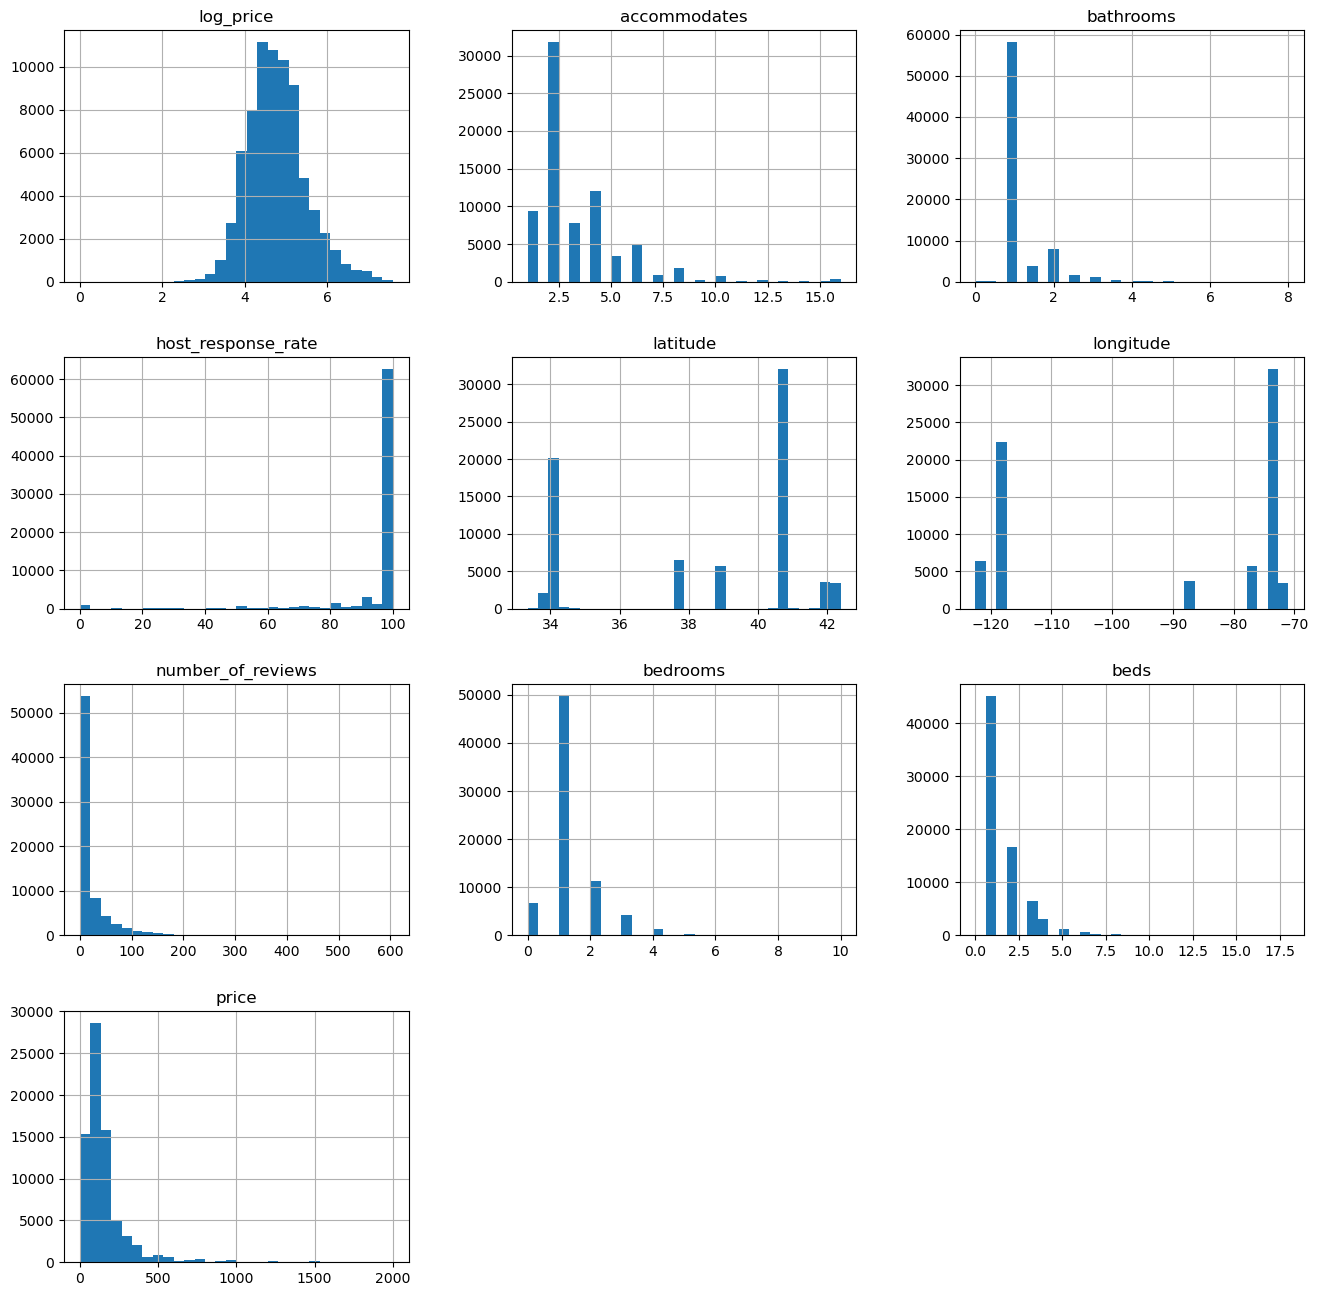

In [30]:
df.hist(bins=30,figsize=(16,16))

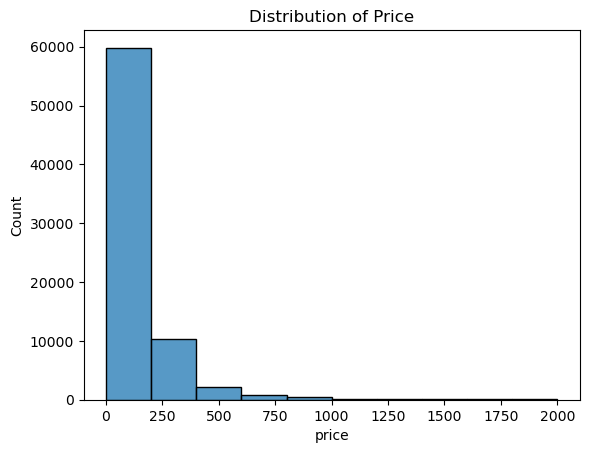

In [31]:
#Checking the Distribution by using histogram
sns.histplot(x="price",data=df,bins=10)
plt.title("Distribution of Price")
plt.show()

In [32]:
#Checking for any negative number of reviews column values
No_Of_reviews_below_0 = df[df["number_of_reviews"]<0]
No_Of_reviews_below_0

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price


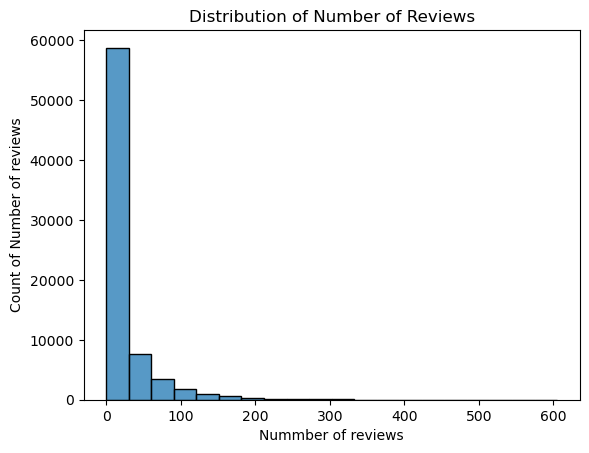

In [33]:
#Distribution of Number of Reviews column
sns.histplot(x="number_of_reviews",data=df,bins=20)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Nummber of reviews")
plt.ylabel("Count of Number of reviews")
plt.show()

From above histogram we can see that bulk of the reviews from the range of between 1 to 100 especially more in the range of 0-20.

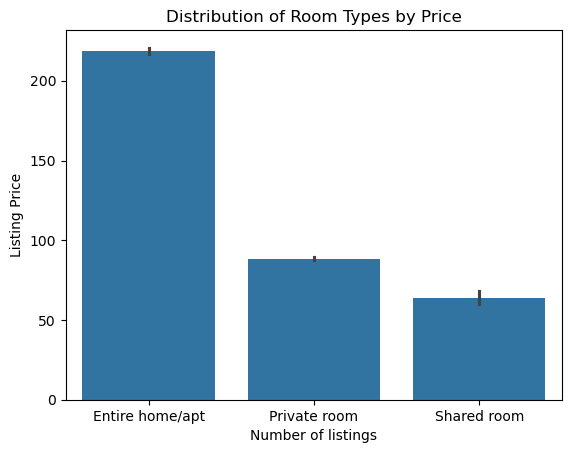

In [35]:
# using barplot to analyze the room type distibution
sns.barplot(x="room_type",y="price",data=df)
plt.title("Distribution of Room Types by Price")
plt.xlabel("Number of listings")
plt.ylabel("Listing Price")
plt.show()

From above visual we can see that the listing price of Entire Home\Apartment is high.<br>Moving on Private Room has moderate listing Price which half of the Entire home/Apartment.<br>Finally we have shared room category at last.

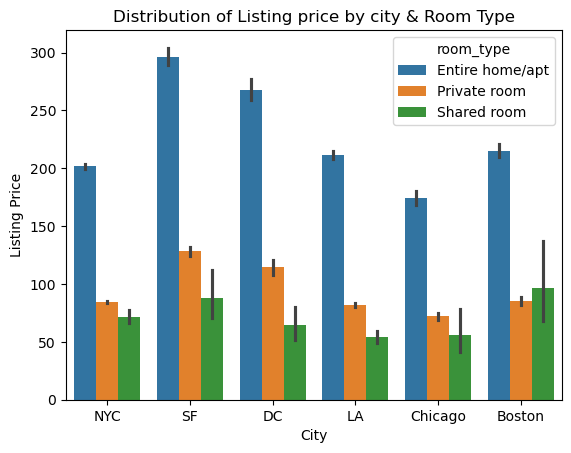

In [37]:
## Distribution of Listing price column
sns.barplot(x="city",y="price",data=df,hue="room_type")
plt.title("Distribution of Listing price by city & Room Type")
plt.xlabel("City")
plt.ylabel("Listing Price")
plt.show()

We can see that all the cities the entire Home/Apartment is highly expensive followed by Private Room & Shared room at least Pricing which we found from our previous visuals.<br>We can observe that most expensive listing prices are from San Franciso city followed by DC in the Second Place and we can see similar listing pricing pattern with slight variaion in Boston,Chicago,Los Angles and less listing prices from New York City.

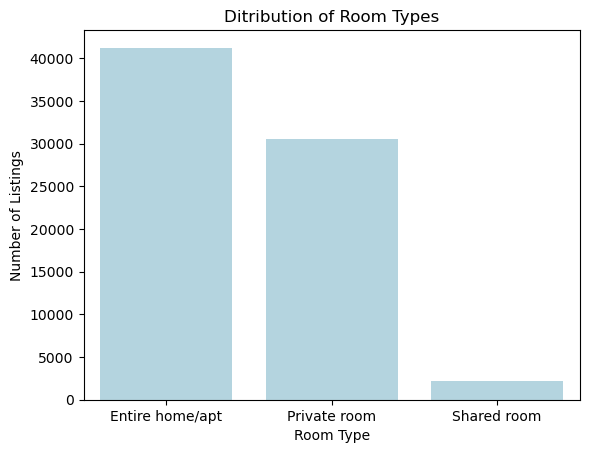

In [39]:
#Distibution of Number of listing by Room Type
sns.countplot(x="room_type",data=df,color="lightblue")
plt.title("Ditribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

We can see that the pattern matches with Listing price of Room Types in which the Entire Home/Apartment has most Number of listings followed by Private room and we have least number of listings from Shared Room Type. 

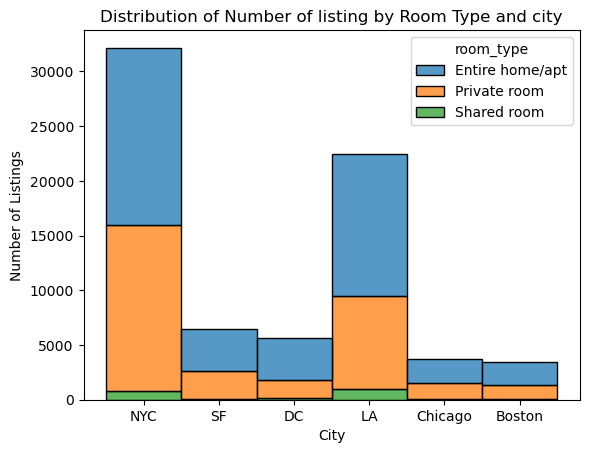

In [41]:
#Distribution of Number of listing by Room Type and city
sns.histplot(x="city",data=df,hue="room_type",multiple="stack")
plt.title("Distribution of Number of listing by Room Type and city")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.show()

We can see that among all the cities the entire Home/Apartment has high number of Listings followed by Private Room & Shared room at least Number of listings which we found from our previous visuals.<br>From above distribution visual we can see that the most number of listings are from New York City followed by Los Angles.<br>In the cities like Chicago ,Boston,DC and San Fransisco we can see that there is significantly low amount of Number of Listings from shared Room Types.

In [43]:
# Checking for the Corelation 
nums_col = []
for column in df.columns:
    if df[column].dtype != object:
        nums_col.append(column)
nums_col_corr = df[nums_col].corr()

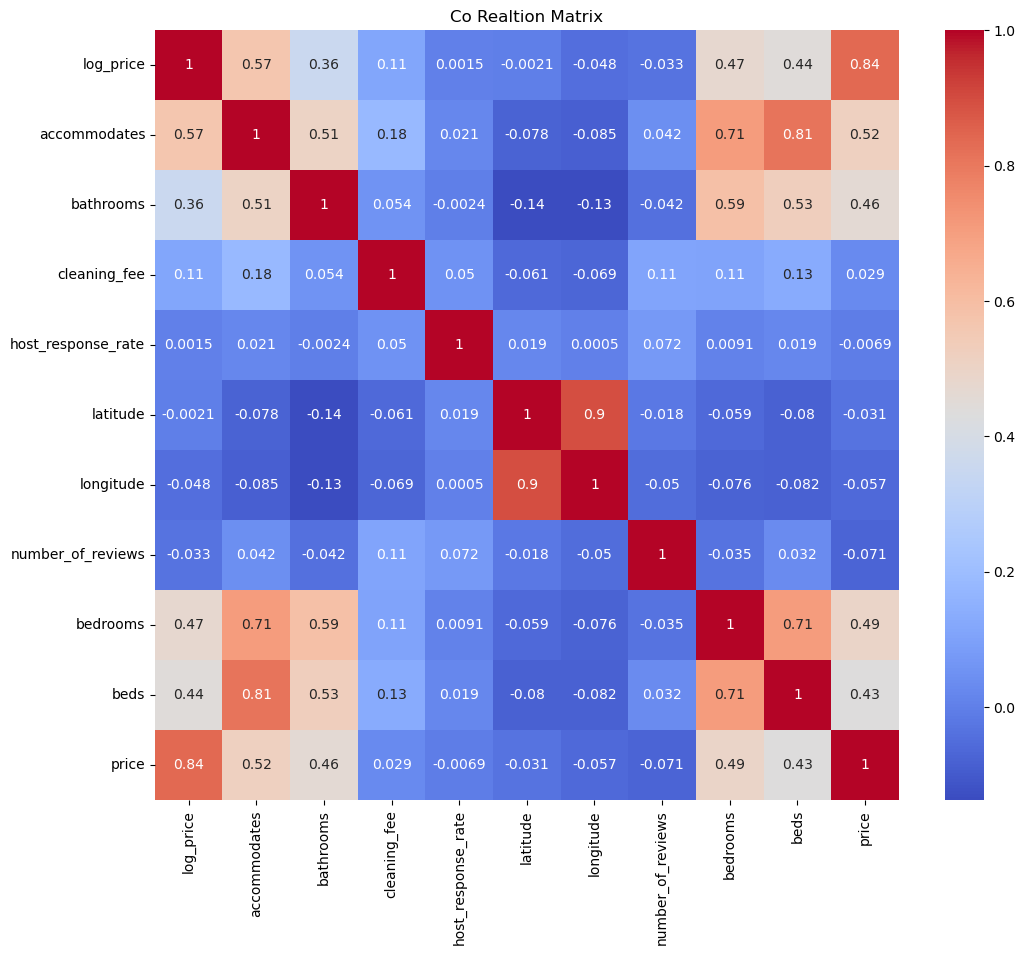

In [44]:
# plotting correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(nums_col_corr,cmap="coolwarm",annot=True)
plt.title("Co Realtion Matrix")
plt.show()

From above Co relation matrix we can see that there is a Co relation between Accomadates and Listing Price,Beds and Bed Rooms available.

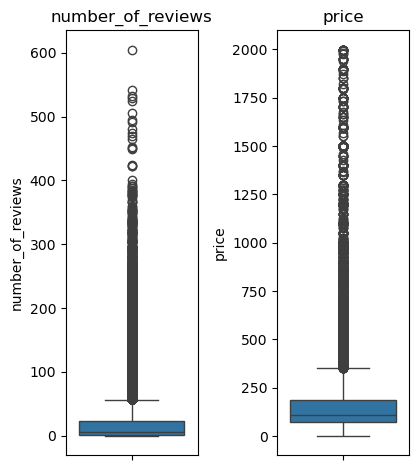

In [46]:
#Checking for oulilers in the price and Number of Reviews columns
for i,column in enumerate (df[["number_of_reviews","price"]]):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [47]:
# Detection and Removal of outliers in price and Number of Reviews column

def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    print(f"Lower bound is = {lower_bound}")

    upper_bound = q3 + (1.5 * iqr)
    print(f"Upper Bound is = {upper_bound}")
      
    #here i'm taking all Outliers and appending this in Variable "Outlier".
    outlier =[]
    for i in data:
        if i < lower_bound:
            outlier.append(i)
            data.drop(data==i)
        elif i > upper_bound:
            outlier.append(i)


    #With the help of "index" function here we are getting all the indexes of Lower bound and upper bound

    index_outlier = df[data < lower_bound ].index  
    index_outlier = df[data > upper_bound].index

    #here we are seeing before and after shape.
    
    print(f'\nBEFORE dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')
    df.drop(index_outlier,inplace=True)
    print(f'AFTER dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')



print("The Outlier removel of Price column")
outliers(df["price"])

print("\nThe Outlier removel of number of Reviews column")
outliers(df["number_of_reviews"])

The Outlier removel of Price column
Lower bound is = -89.99999989132326
Upper Bound is = 349.99999991160996

BEFORE dropping Outlier we have rows = 73923, and columns = 27
AFTER dropping Outlier we have rows = 68840, and columns = 27

The Outlier removel of number of Reviews column
Lower bound is = -33.5
Upper Bound is = 58.5

BEFORE dropping Outlier we have rows = 68840, and columns = 27
AFTER dropping Outlier we have rows = 61270, and columns = 27


In [48]:
df.shape

(61270, 27)

## Data Preprocessing

When our data is in non numerical format the model unable to identify the non numerical data.<br> So we have to convert the non numercal data to numerical for model understanding.<br>To do this we use encoding from encoding we will use Label_encoder which is most used encoding method

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61270 entries, 0 to 74109
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               61270 non-null  float64
 1   property_type           61270 non-null  object 
 2   room_type               61270 non-null  object 
 3   amenities               61270 non-null  object 
 4   accommodates            61270 non-null  int64  
 5   bathrooms               61270 non-null  float64
 6   bed_type                61270 non-null  object 
 7   cancellation_policy     61270 non-null  object 
 8   cleaning_fee            61270 non-null  bool   
 9   city                    61270 non-null  object 
 10  description             61270 non-null  object 
 11  first_review            61270 non-null  object 
 12  host_identity_verified  61270 non-null  object 
 13  host_response_rate      61270 non-null  int32  
 14  host_since              61270 non-null  obj

In [52]:
#Laabel Encoding
for column in ["property_type","room_type","number_of_reviews","city","amenities","neighbourhood","latitude","longitude","host_since","accommodates","zipcode","host_response_rate","last_review","price"]:
    le = LabelEncoder()
    df[column]= le.fit_transform(df[column])

### Preparation  and splitting of Training and Testing sets For Machine Learing Algorithums

In [54]:
#Preparing the datasets for training and testing.
x = df[["property_type","room_type","number_of_reviews","city","amenities","latitude","longitude","neighbourhood","host_since","accommodates","zipcode","host_response_rate"]]#independent variables
y = df["price"] # Dependent variables
x.head()

,property_type,room_type,number_of_reviews,city,amenities,latitude,longitude,neighbourhood,host_since,accommodates,zipcode,host_response_rate
0,0,0,2,4,5502,35671,34343,77,2507,2,102,79
1,0,0,6,4,5618,48682,35200,248,1838,6,18,79
2,0,0,10,4,18779,52660,49542,243,2470,4,25,79
4,0,0,4,2,46233,26330,27532,117,20,1,205,79
5,0,1,3,5,41636,19794,2003,386,649,1,644,79


In [55]:
#splitting the training and test sets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test,lr_pred)
print(f"The R Square score for the Linear Regression model is :{r2_score(y_test,lr_pred)}")
print(f"The MSE score for the Linear Regression model is :{lr_mse}")
print(f"The RMSE Score for the Linear Regression Model is :{np.sqrt(lr_mse)}")

The R Square score for the Linear Regression model is :0.459796626139941
The MSE score for the Linear Regression model is :2938.6505314582923
The RMSE Score for the Linear Regression Model is :54.20932144436317


In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_pred = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test,lasso_pred)
print(f"The R Square score for the Lasso Linear Regression model is :{r2_score(y_test,lasso_pred)}")
print(f"The MSE score for the Lasso Linear Regression model is :{lasso_mse}")
print(f"The RMSE Score for the Laso Linear Regression Model is :{np.sqrt(lasso_mse)}")

The R Square score for the Lasso Linear Regression model is :0.45969301477200164
The MSE score for the Lasso Linear Regression model is :2939.2141665931204
The RMSE Score for the Laso Linear Regression Model is :54.2145198871402


## KNN

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_mse = mean_squared_error(y_test,knn_pred)
print(f"The R Square score for the KNN model is :{r2_score(y_test,knn_pred)}")
print(f"The MSE score for the KNN model is :{knn_mse}")
print(f"The RMSE Score for the KNN Model is :{np.sqrt(knn_mse)}")

The R Square score for the KNN model is :0.15273229036585034
The MSE score for the KNN model is :4609.0487873347465
The RMSE Score for the KNN Model is :67.88997560269665


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_mse = mean_squared_error(y_test,dt_pred)
print(f"The R Square score for the Decision Tree model is :{r2_score(y_test,dt_pred)}")
print(f"The MSE score for the Decision Tree model is :{dt_mse}")
print(f"The RMSE Score for the Decision Tree Model is :{np.sqrt(dt_mse)}")

The R Square score for the Decision Tree model is :0.20926470753701587
The MSE score for the Decision Tree model is :4301.518279745389
The RMSE Score for the Decision Tree Model is :65.58596099582127


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = dt.predict(x_test)
rf_mse = mean_squared_error(y_test,rf_pred)
print(f"The R Square score for the Random Forest model is :{r2_score(y_test,rf_pred)}")
print(f"The MSE score for the Random Forest model is :{rf_mse}")
print(f"The RMSE Score for the Random Forest Model is :{np.sqrt(rf_mse)}")

The R Square score for the Random Forest model is :0.20926470753701587
The MSE score for the Random Forest model is :4301.518279745389
The RMSE Score for the Random Forest Model is :65.58596099582127


## Support Vector Machine

In [70]:
from sklearn.svm import LinearSVR

In [71]:
svr = LinearSVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_mse = mean_squared_error(y_test,svr_pred)
print(f"The R Square score for the SVM model is :{r2_score(y_test,svr_pred)}")
print(f"The MSE score for the SVM model is :{svr_mse}")
print(f"The RMSE Score for the SVM Model is :{np.sqrt(svr_mse)}")

The R Square score for the SVM model is :-1.072363477331126
The MSE score for the SVM model is :11273.443167371785
The RMSE Score for the SVM Model is :106.17647181636704


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
from xgboost import XGBRegressor

In [73]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_mse = mean_squared_error(y_test,xgb_pred)
print(f"The R Square score for the XGBoost model is :{r2_score(y_test,xgb_pred)}")
print(f"The MSE score for the XGBoost model is :{xgb_mse}")
print(f"The RMSE Score for the XGBoost Model is :{np.sqrt(xgb_mse)}")

The R Square score for the XGBoost model is :0.6039524078369141
The MSE score for the XGBoost model is :2154.457757643462
The RMSE Score for the XGBoost Model is :46.41613682377565


From the metrics of R Square score we can prefer the model which give R Square close to 1 which explains the  the variance in the dependent variable is explained by the independent variables in the model and Lower Rmse score is preferred becuse it explains the error in the model. 

From above use of various model we can see that XGBoost is giving best R square(r2) score and low Mean Squared Error (MSE) among all the model.So, we try to Hypertune tha models for better R2 score and MSE.

### Hyperparameter Tunning

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
param_dist = {
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': np.arange(100, 500, 50),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(xgb,param_dist,cv=5, scoring='r2')
random_search.fit(x_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.042222222222222223}


In [79]:
xgb_best = random_search.best_estimator_
xgb_best_predict = xgb_best.predict(x_test)
xgb_r2_best = r2_score(y_test,xgb_best_predict)
xgb_mse_best = mean_squared_error(y_test,xgb_best_predict)
print(f"The R Square score for the XGBoost model is :{r2_score(y_test,xgb_best_predict)}")
print(f"The MSE score for the XGBoost model is :{xgb_mse_best}")
print(f"The RMSE Score for the XGBoost Model is :{np.sqrt(xgb_mse_best)}")

The R Square score for the XGBoost model is :0.6148439049720764
The MSE score for the XGBoost model is :2095.2091791703997
The RMSE Score for the XGBoost Model is :45.773454962132796
